In [97]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from keras.applications import VGG16
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import random
import tensorflow as tf
fr
from tensorflow.keras.applications import VGG16

from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


8-

In [6]:
benign = "yes"
malignant = "no"

In [7]:
def load_images(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg"):
            img = cv2.imread(os.path.join(folder, filename))
            img = cv2.resize(img, (224, 224))
            images.append(img)
            labels.append(int(folder == benign))
    return images, labels

In [8]:
benign_images, benign_labels = load_images(benign)
malignant_images, malignant_labels = load_images(malignant)

In [9]:
images = np.concatenate([benign_images, malignant_images])
labels = np.concatenate([benign_labels, malignant_labels])

In [10]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2)

In [11]:
# scale the pixels
train_images = train_images / 255.0
test_images = test_images / 255.0

Classifier 1 "DNN"

In [12]:
model_1 = Sequential([
    Flatten(input_shape=(224, 224, 3)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [13]:
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_3 (Dense)             (None, 64)                9633856   
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9,635,969
Trainable params: 9,635,969
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Train the DNN model and store the training history
history = model_1.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
75/75 [==============================] - 11s 130ms/step - loss: 1.5483 - accuracy: 0.7129 - val_loss: 0.5384 - val_accuracy: 0.7767
Epoch 2/10
75/75 [==============================] - 9s 116ms/step - loss: 0.4800 - accuracy: 0.8112 - val_loss: 0.3159 - val_accuracy: 0.8733
Epoch 3/10
75/75 [==============================] - 9s 114ms/step - loss: 0.2780 - accuracy: 0.8904 - val_loss: 0.2197 - val_accuracy: 0.9400
Epoch 4/10
75/75 [==============================] - 9s 115ms/step - loss: 0.2940 - accuracy: 0.8904 - val_loss: 0.2225 - val_accuracy: 0.9200
Epoch 5/10
75/75 [==============================] - 9s 115ms/step - loss: 0.1409 - accuracy: 0.9608 - val_loss: 0.2112 - val_accuracy: 0.9333
Epoch 6/10
75/75 [==============================] - 9s 114ms/step - loss: 0.1236 - accuracy: 0.9625 - val_loss: 0.2254 - val_accuracy: 0.9300
Epoch 7/10
75/75 [==============================] - 9s 114ms/step - loss: 0.1069 - accuracy: 0.9638 - val_loss: 0.2161 - val_accuracy: 0.9283
Epoch

In [16]:
test_loss, test_acc = model_1.evaluate(test_images, test_labels)
print("DEPP NEURAL NETWORK ACCUARCY:", test_acc)

19/19 [==============================] - 0s 9ms/step - loss: 0.2506 - accuracy: 0.9233
DEPP NEURAL NETWORK ACCUARCY: 0.9233333468437195


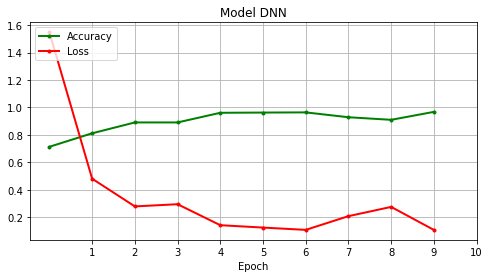

In [53]:
plt.figure(figsize=(8, 4))
plt.grid(True)
plt.plot(history.history['accuracy'], '.g-', linewidth=2)
plt.plot(history.history['loss'], '.r-', linewidth=2)
plt.title('Model DNN')
plt.xlabel('Epoch')
plt.xticks(range(1, len(history.history['accuracy']) + 1))
plt.legend(['Accuracy', 'Loss'], loc='upper left')
plt.show()


19/19 [==============================] - 0s 9ms/step


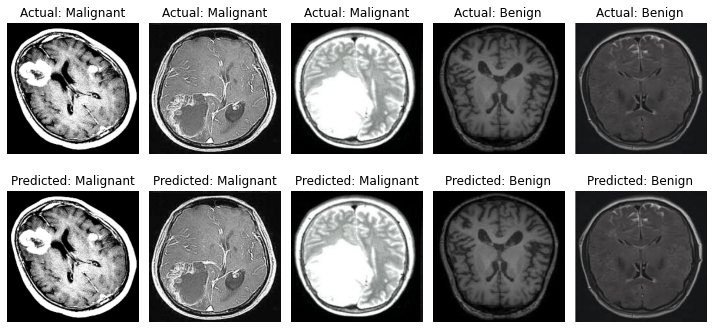

In [18]:
predictions = model_1.predict(test_images)
random_indices = random.sample(range(len(test_images)), 5)
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i in range(5):
    random_index = random_indices[i]
    axs[0, i].imshow(test_images[random_index])
    axs[0, i].set_title("Actual: {}".format("Benign" if test_labels[random_index] == 0 else "Malignant"))
    axs[0, i].axis('off')
    prediction = "Benign" if predictions[random_index] < 0.5 else "Malignant"
    axs[1, i].imshow(test_images[random_index])
    axs[1, i].set_title("Predicted: {}".format(prediction))
    axs[1, i].axis('off')
plt.tight_layout()
plt.show()

CNN 

In [19]:
model_2 = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [20]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
model_2.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 26, 26, 64)      

In [22]:
history_2 = model_2.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
75/75 [==============================] - 36s 470ms/step - loss: 0.5123 - accuracy: 0.7525 - val_loss: 0.3499 - val_accuracy: 0.8400
Epoch 2/10
75/75 [==============================] - 34s 452ms/step - loss: 0.2305 - accuracy: 0.9042 - val_loss: 0.2066 - val_accuracy: 0.9233
Epoch 3/10
75/75 [==============================] - 33s 445ms/step - loss: 0.1358 - accuracy: 0.9508 - val_loss: 0.1655 - val_accuracy: 0.9467
Epoch 4/10
75/75 [==============================] - 35s 471ms/step - loss: 0.0632 - accuracy: 0.9800 - val_loss: 0.1488 - val_accuracy: 0.9617
Epoch 5/10
75/75 [==============================] - 37s 498ms/step - loss: 0.0393 - accuracy: 0.9871 - val_loss: 0.1425 - val_accuracy: 0.9600
Epoch 6/10
75/75 [==============================] - 38s 506ms/step - loss: 0.0240 - accuracy: 0.9925 - val_loss: 0.1176 - val_accuracy: 0.9817
Epoch 7/10
75/75 [==============================] - 37s 497ms/step - loss: 0.0041 - accuracy: 0.9996 - val_loss: 0.1399 - val_accuracy: 0.9783

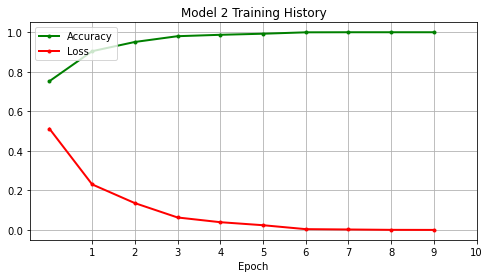

In [56]:
plt.figure(figsize=(8, 4))
plt.grid(True)
plt.plot(history_2.history['accuracy'], '.g-', linewidth=2)
plt.plot(history_2.history['loss'], '.r-', linewidth=2)
plt.title('Model 2 Training History')
plt.xlabel('Epoch')
plt.xticks(range(1, len(history_2.history['accuracy']) + 1))
plt.legend(['Accuracy', 'Loss'], loc='upper left')
plt.show()

In [24]:
test_loss, test_acc = model_2.evaluate(test_images, test_labels)
print("Convolutional Neural Network accuracy:", test_acc)

19/19 [==============================] - 2s 99ms/step - loss: 0.1745 - accuracy: 0.9817
Convolutional Neural Network accuracy: 0.9816666841506958


1/1 [==============================] - 0s 19ms/step


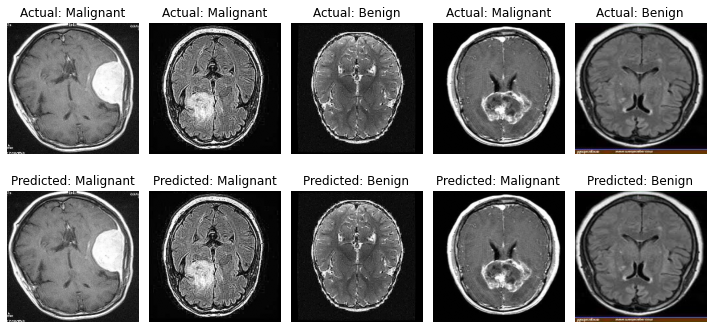

In [55]:
import random
import matplotlib.pyplot as plt
random_indices = random.sample(range(len(test_images)), 5)
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i in range(5):
    random_index = random_indices[i]
    axs[0, i].imshow(test_images[random_index])
    axs[0, i].set_title("Actual: {}".format("Benign" if test_labels[random_index] == 0 else "Malignant"))
    axs[0, i].axis('off')
    img = test_images[random_index].reshape(1, 224, 224, 3)
    prediction = "Benigin" if model_2.predict(img)[0][0] < 0.5 else "Malignant"
    axs[1, i].imshow(test_images[random_index])
    axs[1, i].set_title("Predicted: {}".format(prediction))
    axs[1, i].axis('off')
plt.tight_layout()
plt.show()

In [40]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model_3 = Sequential()
model_3.add(base_model)
model_3.add(Flatten())
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))

In [41]:
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 25088)             0         
                                                                 
 dense_15 (Dense)            (None, 64)                1605696   
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                                 
Total params: 16,320,449
Trainable params: 16,320,449
Non-trainable params: 0
_________________________________________________________________


In [43]:
history_3 = model_3.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
75/75 [==============================] - 982s 13s/step - loss: 0.8288 - accuracy: 0.6108 - val_loss: 0.5307 - val_accuracy: 0.7900
Epoch 2/10
75/75 [==============================] - 1110s 15s/step - loss: 0.5252 - accuracy: 0.7287 - val_loss: 0.4670 - val_accuracy: 0.7650
Epoch 3/10
75/75 [==============================] - 994s 13s/step - loss: 0.4516 - accuracy: 0.7896 - val_loss: 0.5856 - val_accuracy: 0.7117
Epoch 4/10
75/75 [==============================] - 948s 13s/step - loss: 0.4030 - accuracy: 0.8233 - val_loss: 0.3393 - val_accuracy: 0.8650
Epoch 5/10
75/75 [==============================] - 947s 13s/step - loss: 0.3580 - accuracy: 0.8421 - val_loss: 0.3529 - val_accuracy: 0.8633
Epoch 6/10
75/75 [==============================] - 961s 13s/step - loss: 0.3083 - accuracy: 0.8696 - val_loss: 0.2666 - val_accuracy: 0.8933
Epoch 7/10
75/75 [==============================] - 960s 13s/step - loss: 0.2707 - accuracy: 0.8908 - val_loss: 0.3038 - val_accuracy: 0.8783
Epoch

In [49]:
test_loss, test_accuracy = model_3.evaluate(test_images, test_labels)
print("Test accuracy:", test_accuracy)

19/19 [==============================] - 53s 3s/step - loss: 0.2004 - accuracy: 0.9250
Test accuracy: 0.925000011920929


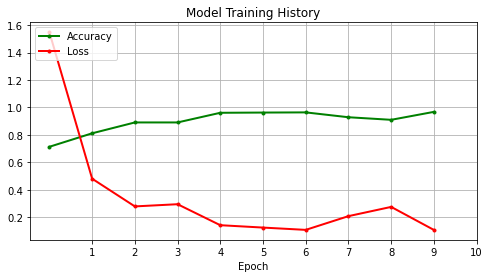

In [47]:
plt.figure(figsize=(8, 4))
plt.grid(True)
plt.plot(history.history['accuracy'], '.g-', linewidth=2)
plt.plot(history.history['loss'], '.r-', linewidth=2)
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.xticks(range(1, len(history.history['accuracy']) + 1))
plt.legend(['Accuracy', 'Loss'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 95ms/step


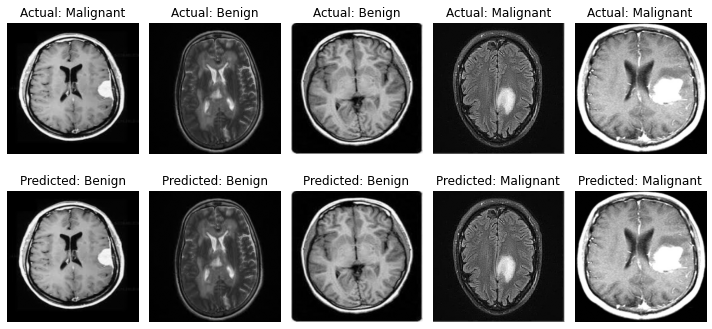

In [58]:
random_indices = random.sample(range(len(test_images)), 5)
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i in range(5):
    random_index = random_indices[i]
    axs[0, i].imshow(test_images[random_index])
    axs[0, i].set_title("Actual: {}".format("Benign" if test_labels[random_index] == 0 else "Malignant"))
    axs[0, i].axis('off')
    img = test_images[random_index].reshape(1, 224, 224, 3)
    prediction = "Benign" if model_3.predict(img)[0][0] < 0.5 else "Malignant"
    axs[1, i].imshow(test_images[random_index])
    axs[1, i].set_title("Predicted: {}".format(prediction))
    axs[1, i].axis('off')
plt.tight_layout()
plt.show()


comparison of the three classfieries 

1/1 [==============================] - 0s 137ms/step


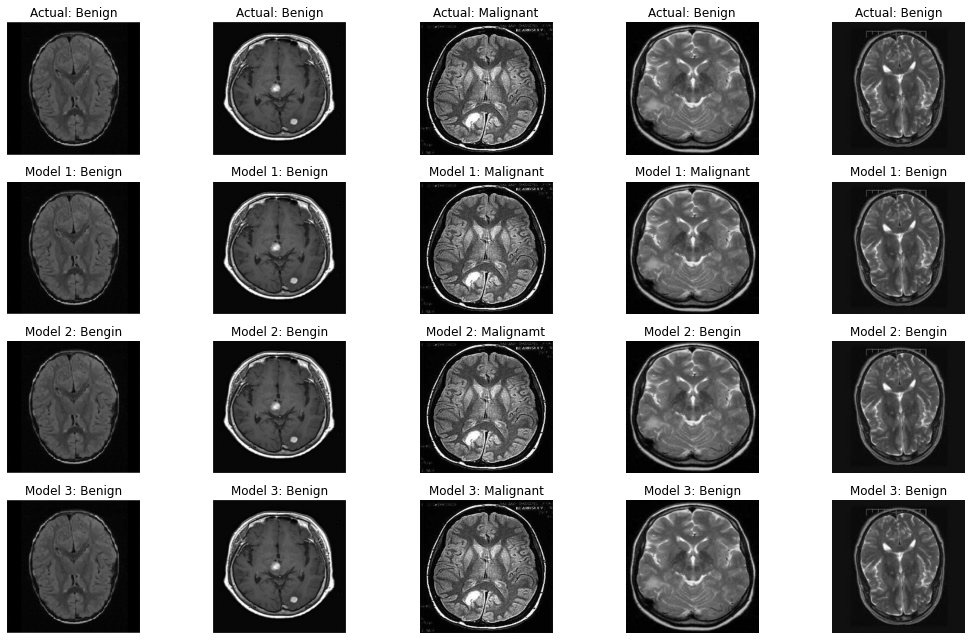

In [96]:
random_indices = random.sample(range(len(test_images)), 5)
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(15, 9))
for i in range(5):
    random_index = random_indices[i]
    img = test_images[random_index]
    actual_label = "Benign" if test_labels[random_index] == 0 else "Malignant"
    axs[0, i].imshow(img)
    axs[0, i].set_title("Actual: {}".format(actual_label))
    axs[0, i].axis('off')
    axs[1, i].imshow(img)
    axs[1, i].set_title("Model 1: {}".format("Benign" if model_1.predict(img.reshape(1, 224, 224, 3))[0][0] < 0.5 else "Malignant"))
    axs[1, i].axis('off')
    axs[2, i].imshow(img)
    axs[2, i].set_title("Model 2: {}".format("Bengin" if model_2.predict(img.reshape(1, 224, 224, 3))[0][0] < 0.5 else "Malignamt"))
    axs[2, i].axis('off')
    axs[3, i].imshow(img)
    axs[3, i].set_title("Model 3: {}".format("Benign" if model_3.predict(img.reshape(1, 224, 224, 3))[0][0] < 0.5 else "Malignant"))
    axs[3, i].axis('off')
plt.tight_layout()
plt.show()

In [73]:
predictions_model1 = model_1.predict(test_images)
predictions_model2 = model_2.predict(test_images)
predictions_model3 = model_3.predict(test_images)

19/19 [==============================] - 57s 3s/step


In [74]:
binary_predictions_model1 = (predictions_model1 >= 0.5).astype(int)
binary_predictions_model2 = (predictions_model2 >= 0.5).astype(int)
binary_predictions_model3 = (predictions_model3 >= 0.5).astype(int)

In [75]:
cm_model1 = confusion_matrix(test_labels, binary_predictions_model1)
cm_model2 = confusion_matrix(test_labels, binary_predictions_model2)
cm_model3 = confusion_matrix(test_labels, binary_predictions_model3)

In [77]:
acc_model1 = accuracy_score(test_labels, binary_predictions_model1)
acc_model2 = accuracy_score(test_labels, binary_predictions_model2)
acc_model3 = accuracy_score(test_labels, binary_predictions_model3)
precision_model1 = precision_score(test_labels, binary_predictions_model1)
precision_model2 = precision_score(test_labels, binary_predictions_model2)
precision_model3 = precision_score(test_labels, binary_predictions_model3)
recall_model1 = recall_score(test_labels, binary_predictions_model1)
recall_model2 = recall_score(test_labels, binary_predictions_model2)
recall_model3 = recall_score(test_labels, binary_predictions_model3)
f1_score_model1 = f1_score(test_labels, binary_predictions_model1)
f1_score_model2 = f1_score(test_labels, binary_predictions_model2)
f1_score_model3 = f1_score(test_labels, binary_predictions_model3)

In [86]:
print("Model 1:")
print("************")
print(cm_model1)
print("************")
print("Accuracy:", acc_model1)
print("Precision:", precision_model1)
print("Recall:", recall_model1)
print("F1 Score:", f1_score_model1)
print()

Model 1:
************
[[264  41]
 [  5 290]]
************
Accuracy: 0.9233333333333333
Precision: 0.8761329305135952
Recall: 0.9830508474576272
F1 Score: 0.9265175718849841



In [84]:
print(" Model 2:")
print("************")
print(cm_model2)
print("************")
print("Accuracy:", acc_model2)
print("Precision:", precision_model2)
print("Recall:", recall_model2)
print("F1 qScore:", f1_score_model2)
print()


 Model 2:
************
[[298   7]
 [  4 291]]
************
Accuracy: 0.9816666666666667
Precision: 0.9765100671140939
Recall: 0.9864406779661017
F1 qScore: 0.9814502529510961



In [85]:
print(" Model 3:")
print("************")
print(cm_model3)
print("************")
print("Accuracy:", acc_model3)

print("Precision:", precision_model3)
print("Recall:", recall_model3)
print("F1 Score:", f1_score_model3)


 Model 3:
************
[[284  21]
 [ 24 271]]
************
Accuracy: 0.925
Precision: 0.928082191780822
Recall: 0.9186440677966101
F1 Score: 0.9233390119250425
